<a href="https://colab.research.google.com/github/Harsh-C7/Zomato-Data-Analysis/blob/main/Zomato_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Zomato data .csv')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [4]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [6]:
df.shape

(148, 7)

In [11]:
def handleData(data):
  convertToString = str(data).split('/')
  rating = convertToString[0]
  return float(rating)

df['rate'] = df['rate'].apply(handleData)

In [12]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


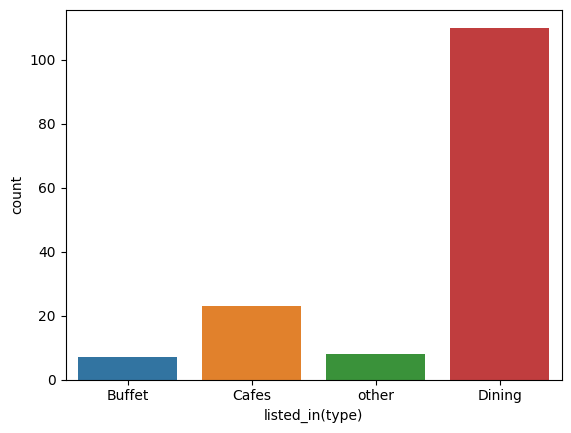

In [23]:
sns.countplot(x='listed_in(type)', data=df, hue="listed_in(type)")
plt.show()

**Conclusion: The majority of the restaurants fall into the dining category.**

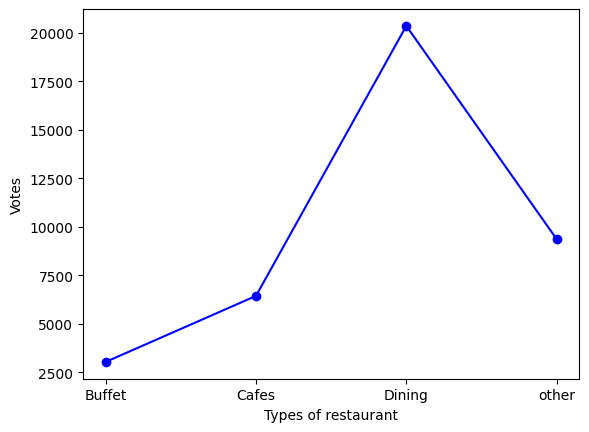

In [27]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="blue", marker="o")
plt.xlabel("Types of restaurant", c="black", size=10)
plt.ylabel("Votes", c="black", size=10)
plt.show()

**Conclusion: Dining restaurants are preferred by a larger number of individuals.**

In [28]:
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


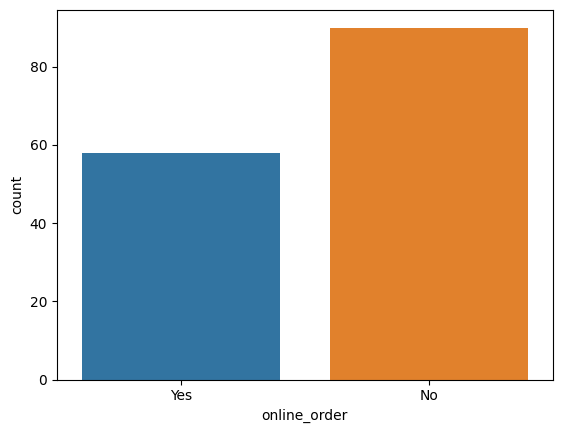

In [31]:
sns.countplot(data= df, x='online_order', hue ='online_order')
plt.show()

**Conclusion: This suggests that a majority of the restaurants do not accept online orders.**

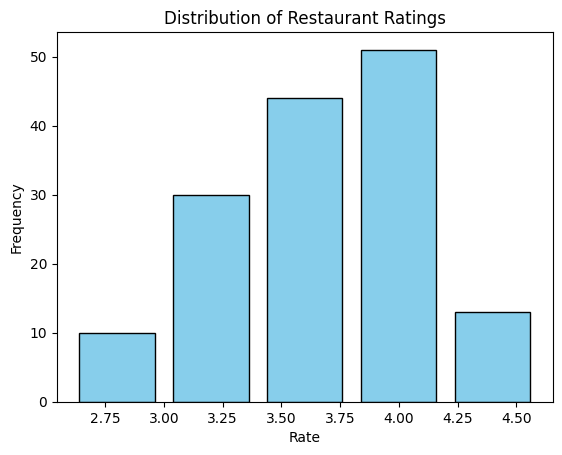

In [35]:
plt.hist(data=df, x='rate', bins=5, rwidth=0.8, color='skyblue', edgecolor='black')
plt.xlabel("Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Restaurant Ratings")
plt.show()

**Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.**

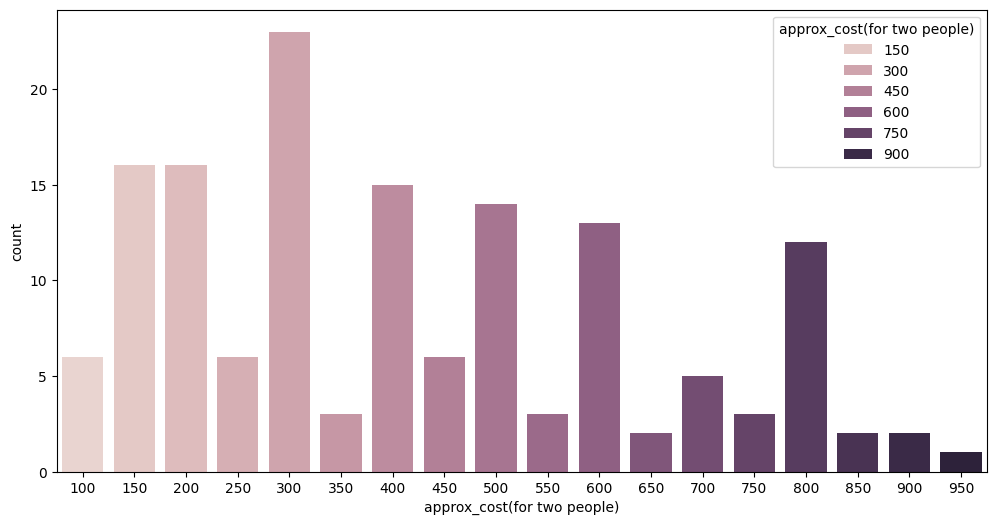

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='approx_cost(for two people)', hue='approx_cost(for two people)')
plt.show()

**Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.**

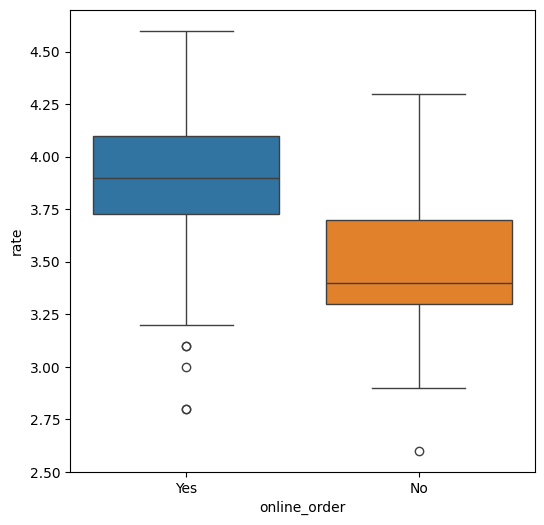

In [40]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df, x='online_order', y='rate', hue='online_order')
plt.show()

**Conclusion: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.**

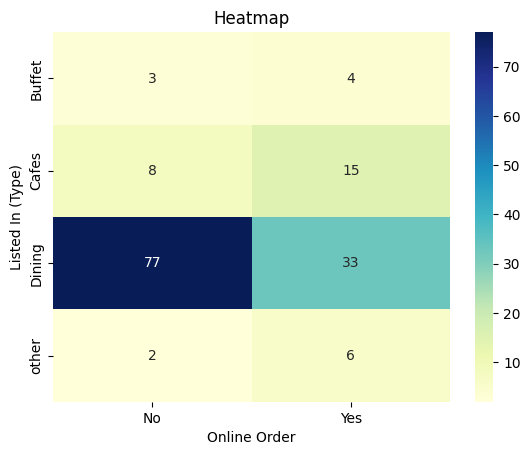

In [41]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

**Conclusion: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.**